Jonathon Nguyen
ID: 801093003

<b>Problem One<b>

Pass five random images (from the internet) to ResNet 101, and analyze the outcomes.

In [161]:
from torchvision import models
from torchvision import transforms
from PIL import Image
import torch

In [162]:
# Setting up the Resnet 101 instance with a pretrained model.
resnet = models.resnet101(pretrained=True)

# A preprocesing function that resizes images to 256x256 and crops it to 224x224 around the center.
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

# Open the five random images and preprocess them in the function.
image1 = Image.open("images/p1-3/1.jpg")
image1_processed = preprocess(image1)

image2 = Image.open("images/p1-3/2.jpg")
image2_processed = preprocess(image2)

image3 = Image.open("images/p1-3/3.jpg")
image3_processed = preprocess(image3)

image4 = Image.open("images/p1-3/4.jpg")
image4_processed = preprocess(image4)

image5 = Image.open("images/p1-3/5.jpg")
image5_processed = preprocess(image5)

In [163]:
# This fetches the 1000 labels that the pretrain model is made for.
with open("labels.txt") as f:
    labels = [line.strip() for line in f.readlines()]

The following ten cells are the same in term of the functional code. The only difference is the image passing through the model

In [164]:
# Pass the processed image through the network
batch = torch.unsqueeze(image1_processed, 0)
resnet.eval()
out = resnet(batch)

# Obtain the highest score for a label.
_, index = torch.max(out, 1)
print("Highest score")
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

Highest score


('seashore, coast, seacoast, sea-coast', 94.57710266113281)

In [165]:
# Obtain the top five label sorted by the high score.
_, indices = torch.sort(out, descending=True)
print("Top five")
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Top five


[('seashore, coast, seacoast, sea-coast', 94.57710266113281),
 ('sandbar, sand bar', 2.9707391262054443),
 ('promontory, headland, head, foreland', 0.5567770004272461),
 ('conch', 0.2732352614402771),
 ('wreck', 0.21732346713542938)]

In [166]:
# Pass the processed image through the network
batch = torch.unsqueeze(image2_processed, 0)
resnet.eval()
out = resnet(batch)

# Obtain the highest score for a label.
_, index = torch.max(out, 1)
print("Highest probability")
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

Highest probability


('banana', 99.0882568359375)

In [167]:
# Obtain the top five label sorted by the high score.
_, indices = torch.sort(out, descending=True)
print("Top five")
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Top five


[('banana', 99.0882568359375),
 ('zucchini, courgette', 0.3083200752735138),
 ('paddle, boat paddle', 0.05896444246172905),
 ('grocery store, grocery, food market, market', 0.04304724559187889),
 ('sunscreen, sunblock, sun blocker', 0.03389247506856918)]

In [168]:
# Pass the processed image through the network
batch = torch.unsqueeze(image3_processed, 0)
resnet.eval()
out = resnet(batch)

# Obtain the highest score for a label.
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print("Highest probability")
labels[index[0]], percentage[index[0]].item()

Highest probability


('sports car, sport car', 64.5838623046875)

In [169]:
# Obtain the top five label sorted by the high score.
_, indices = torch.sort(out, descending=True)
print("Top five")
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Top five


[('sports car, sport car', 64.5838623046875),
 ('racer, race car, racing car', 32.53407287597656),
 ('car wheel', 2.582920789718628),
 ('convertible', 0.16065403819084167),
 ('grille, radiator grille', 0.08826594054698944)]

In [170]:
# Pass the processed image through the network
batch = torch.unsqueeze(image4_processed, 0)
resnet.eval()
out = resnet(batch)

# Obtain the highest score for a label.
_, index = torch.max(out, 1)
print("Highest probability")
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

Highest probability


('daisy', 98.50100708007812)

In [171]:
# Obtain the top five label sorted by the high score.
_, indices = torch.sort(out, descending=True)
print("Top five")
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Top five


[('daisy', 98.50100708007812),
 ('pot, flowerpot', 0.4494076669216156),
 ('bee', 0.10850977897644043),
 ('sulphur butterfly, sulfur butterfly', 0.08453172445297241),
 ('hair slide', 0.0708497017621994)]

In [172]:
# Pass the processed image through the network
batch = torch.unsqueeze(image5_processed, 0)
resnet.eval()
out = resnet(batch)

# Obtain the highest score for a label.
_, index = torch.max(out, 1)
print("Highest probability")
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

Highest probability


('television, television system', 99.14179992675781)

In [173]:
# Obtain the top five label sorted by the high score.
_, indices = torch.sort(out, descending=True)
print("Top five")
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Top five


[('television, television system', 99.14179992675781),
 ('screen, CRT screen', 0.5164677500724792),
 ('monitor', 0.19199013710021973),
 ('entertainment center', 0.1167149618268013),
 ('home theater, home theatre', 0.006506641395390034)]

<b>Problem 2<b>

Pass five random images containing horses (one and multiple houses) to ResnetGen network and analyze the outcomes.

In [174]:
# This code is from the 3_cyclegan.ipynb
# This code setup the classes for the CycleGAN network
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [175]:
# Spawn the class
resgen = ResNetGenerator()

# This uses the pretrain model to turn horse to zerba.
model_path = "horse2zebra_0.4.0.pth"
model = torch.load(model_path)
resgen.load_state_dict(model)

# set to evaluate mode.
resgen.eval()

# This is a function that resizes the images to 256x256
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor()])

# Load all the 5 horse images and process them.
horse1 = Image.open("images/p2/horse1.jpg")
horse1_processed = preprocess(horse1)

horse2 = Image.open("images/p2/horse2.jpg")
horse2_processed = preprocess(horse2)

horse3 = Image.open("images/p2/horse3.jpg")
horse3_processed = preprocess(horse3)

horse4 = Image.open("images/p2/horse4.jpg")
horse4_processed = preprocess(horse4)

horse5 = Image.open("images/p2/horse5.jpg")
horse5_processed = preprocess(horse5)

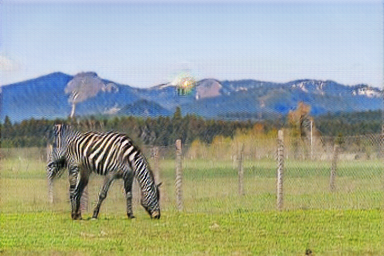

In [176]:
# pass the horse picture through the network
batch = torch.unsqueeze(horse1_processed, 0)
batch_out = resgen(batch)
out = (batch_out.data.squeeze() + 1.0) / 2.0

# Convert the tensor to a ndarray so output can be a image.
out_img1 = transforms.ToPILImage()(out)
out_img1

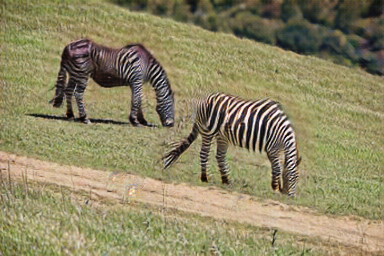

In [177]:
# pass the horse picture through the network
batch = torch.unsqueeze(horse2_processed, 0)
batch_out = resgen(batch)
out = (batch_out.data.squeeze() + 1.0) / 2.0

# Convert the tensor to a ndarray so output can be a image.
out_img2 = transforms.ToPILImage()(out)
out_img2

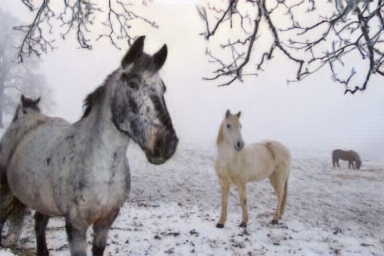

In [178]:
# pass the horse picture through the network
batch = torch.unsqueeze(horse3_processed, 0)
batch_out = resgen(batch)
out = (batch_out.data.squeeze() + 1.0) / 2.0

# Convert the tensor to a ndarray so output can be a image.
out_img3 = transforms.ToPILImage()(out)
out_img3

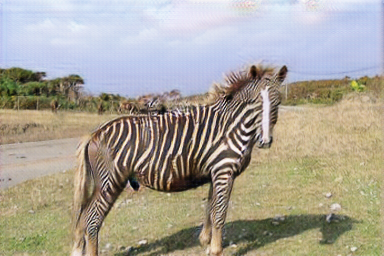

In [179]:
# pass the horse picture through the network
batch = torch.unsqueeze(horse4_processed, 0)
batch_out = resgen(batch)
out = (batch_out.data.squeeze() + 1.0) / 2.0

# Convert the tensor to a ndarray so output can be a image.
out_img4 = transforms.ToPILImage()(out)
out_img4

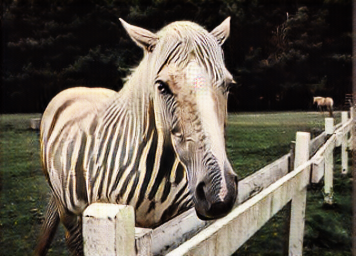

In [180]:
# pass the horse picture through the network
batch = torch.unsqueeze(horse5_processed, 0)
batch_out = resgen(batch)
out = (batch_out.data.squeeze() + 1.0) / 2.0

# Convert the tensor to a ndarray so output can be a image.
out_img5 = transforms.ToPILImage()(out)
out_img5

<b>Problem 3<b>

Use Ptflops and report the number of MACs and models size for resnet and resnetgen

In [195]:
from ptflops import get_model_complexity_info

# Pass the Resnet 101 network through the function to get back the number of parameters and the computational cost
macs, params = get_model_complexity_info(resnet, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=False, verbose=False)

# print out the computational cost and the Model size.
print("ResNet 101")
print("Computational complexity: " + macs)
print("Model size: " + params)

ResNet 101
Computational complexity: 7.85 GMac
Model size: 44.55 M


In [196]:
# Pass the Resnetgen network through the function
macs, params = get_model_complexity_info(resgen, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=False, verbose=False)

# print out the computational cost and the Model size.
print("ResnetGen")
print("Computational complexity: " + macs)
print("Model size: " + params)

ResnetGen
Computational complexity: 43.55 GMac
Model size: 11.38 M


<b>Problem 4<b>

Use MobileNetv2 on the images from problem 1 and use Ptflops to compute

In [183]:
mobilenet = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)

Using cache found in C:\Users\nguyj/.cache\torch\hub\pytorch_vision_v0.10.0


In [184]:
# Pass the processed image through the network
batch = torch.unsqueeze(image1_processed, 0)
mobilenet.eval()
out = mobilenet(batch)
_, index = torch.max(out, 1)

# Obtain the highest score for a label.
print("Highest probability")
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

Highest probability


('seashore, coast, seacoast, sea-coast', 85.70777130126953)

In [185]:
# Obtain the top five label sorted by the high score.
_, indices = torch.sort(out, descending=True)
print("Top five")
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Top five


[('seashore, coast, seacoast, sea-coast', 85.70777130126953),
 ('sandbar, sand bar', 12.938518524169922),
 ('promontory, headland, head, foreland', 0.7330456972122192),
 ('lakeside, lakeshore', 0.11554306000471115),
 ('breakwater, groin, groyne, mole, bulwark, seawall, jetty',
  0.08654245734214783)]

In [186]:
# Pass the processed image through the network
batch = torch.unsqueeze(image2_processed, 0)
mobilenet.eval()
out = mobilenet(batch)
_, index = torch.max(out, 1)

# Obtain the highest score for a label.
print("Highest probability")
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

Highest probability


('banana', 99.95494842529297)

In [187]:
# Obtain the top five label sorted by the high score.
_, indices = torch.sort(out, descending=True)
print("Top five")
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Top five


[('banana', 99.95494842529297),
 ('zucchini, courgette', 0.032383885234594345),
 ('spaghetti squash', 0.004278863314539194),
 ('paddle, boat paddle', 0.0032159292604774237),
 ('clog, geta, patten, sabot', 0.0018797138473019004)]

In [188]:
# Pass the processed image through the network
batch = torch.unsqueeze(image3_processed, 0)
mobilenet.eval()
out = mobilenet(batch)
_, index = torch.max(out, 1)

# Obtain the highest score for a label.
print("Highest probability")
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

Highest probability


('sports car, sport car', 73.56022644042969)

In [189]:
# Obtain the top five label sorted by the high score.
_, indices = torch.sort(out, descending=True)
print("Top five")
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Top five


[('sports car, sport car', 73.56022644042969),
 ('racer, race car, racing car', 9.639795303344727),
 ('cab, hack, taxi, taxicab', 4.994730472564697),
 ('car wheel', 4.946600914001465),
 ('convertible', 2.8517906665802)]

In [190]:
# Pass the processed image through the network
batch = torch.unsqueeze(image4_processed, 0)
mobilenet.eval()
out = mobilenet(batch)
_, index = torch.max(out, 1)

# Obtain the highest score for a label.
print("Highest probability")
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

Highest probability


('daisy', 71.5862045288086)

In [191]:
# Obtain the top five label sorted by the high score.
_, indices = torch.sort(out, descending=True)
print("Top five")
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Top five


[('daisy', 71.5862045288086),
 ('bee', 5.75676965713501),
 ('admiral', 2.1638622283935547),
 ('ant, emmet, pismire', 2.1018965244293213),
 ('vase', 1.926276445388794)]

In [192]:
# Pass the processed image through the network
batch = torch.unsqueeze(image5_processed, 0)
mobilenet.eval()
out = mobilenet(batch)
_, index = torch.max(out, 1)

# Obtain the highest score for a label.
print("Highest probability")
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

Highest probability


('television, television system', 86.53445434570312)

In [193]:
# Obtain the top five label sorted by the high score.
_, indices = torch.sort(out, descending=True)
print("Top five")
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Top five


[('television, television system', 86.53445434570312),
 ('screen, CRT screen', 5.263615131378174),
 ('monitor', 2.920560121536255),
 ('oscilloscope, scope, cathode-ray oscilloscope, CRO', 1.9371237754821777),
 ('cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM',
  0.48603034019470215)]

In [197]:
# Pass the MobileNetV2 network through the function
macs, params = get_model_complexity_info(mobilenet, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=False, verbose=False)

# print out the computational cost and the Model size.
print("MobileNetV2")
print("Computational complexity: " + macs)
print("Model size: " + params)

MobileNetV2
Computational complexity: 0.32 GMac
Model size: 3.5 M
